In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix, classification_report
data = pd.read_csv('C:/Users/user/Desktop/ML Algorithm/diabetes.csv',decimal=",")
df = data.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,1,61,119,22.5,118,70,32,38,0.84,0
1,2,146,79,41,3.6,19,1,60,135,26.4,108,58,33,40,0.83,0
2,3,217,75,54,4.0,20,1,67,187,29.3,110,72,40,45,0.89,0
3,4,226,97,70,3.2,20,1,64,114,19.6,122,64,31,39,0.79,0
4,5,164,91,67,2.4,20,1,70,141,20.2,122,86,32,39,0.82,0


In [2]:
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')

There is 390 rows
There is 16 columns


In [3]:
diabetes=load_diabetes()
X=diabetes.data
X.shape

(442, 10)

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
X[:10]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944183, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04117617, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599898, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [6]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
diabetes.target_filename

'diabetes_target.csv.gz'

In [8]:
variable_names=diabetes.feature_names
print(variable_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [9]:
y=diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [10]:
clustering =KMeans (n_clusters=3, random_state = 5) 
clustering.fit (X)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=5)

In [11]:
from sklearn.cluster import KMeans

kmn=KMeans(n_clusters=4)# k value

kmn.fit(X) # here kmn is considered as model,here x alone given bcoz its unsupervised

y_Kmn=kmn.predict(X) # y_kmn is similar to ypre

print('predicted output = ',y_Kmn[:20]) # printing only top20 predicted output

print('actual output =',y[:20]) # printing only top 20 original output

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


predicted output =  [0 1 0 0 1 3 3 2 0 0 3 0 1 0 1 2 1 2 3 1]
actual output = [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.]


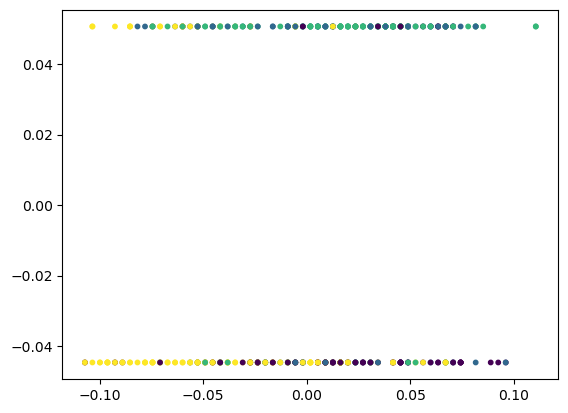

In [12]:
from sklearn.metrics import pairwise_distances_argmin

def finding_cluster(X,n_clusters,rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters] # permutation - arrangment
    centers=X[i]
    while 1:
        labels=pairwise_distances_argmin(X,centers)
        new_centers=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers=new_centers # centroid updation happens here
    return centers,labels

# function call

centers,labels=finding_cluster(X,4)

plt.scatter(X[:,0],X[:,1],s=10,c=labels,cmap='viridis')

In [13]:
#for i in range(10):
#    print(i,end='')

[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

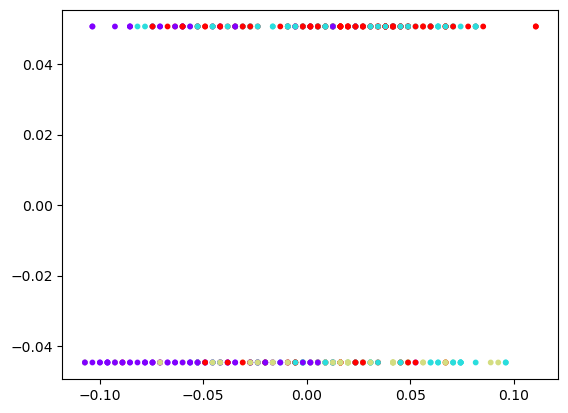

In [14]:
centers,labels=finding_cluster(X,4,rseed=6)
plt.scatter(X[:,0],X[:,1],s=10,c=labels,cmap='rainbow')

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


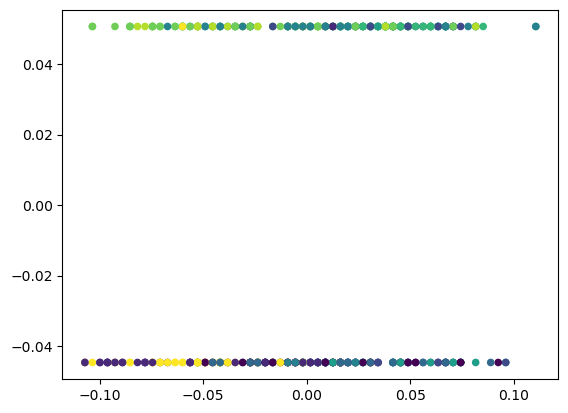

In [15]:
labels=KMeans(10,random_state=2).fit_predict(X)
plt.scatter(X[:,0],X[:,1],s=20,c=labels,cmap='viridis')

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


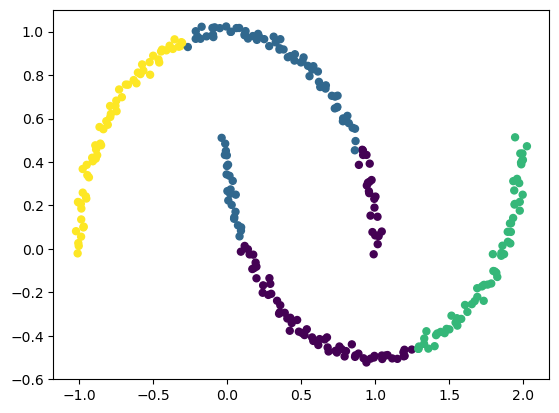

In [16]:
from sklearn.datasets import make_moons
X,y=make_moons(300,noise=0.02,random_state=2)
labels=KMeans(4,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],s=25,c=labels,cmap='viridis')

In [17]:
#kmeans on digits
from sklearn.datasets import load_diabetes
diabete=load_diabetes()
diabete.data.shape

(442, 10)

In [18]:
kmeans=KMeans(n_clusters=10,random_state=2)
clusters=kmeans.fit_predict(diabete.data) # here digit.data is X
kmeans.cluster_centers_.shape

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(10, 10)

In [28]:
#kmc 
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
class clust():
    def _load_diabetes(self, sklearn_load_diabetes):
        data = sklearn_load_diabetes
        X = pd.DataFrame(data.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, data.target, test_size=0.3, random_state=42)
        
        
    def __init__(self, sklearn_load_diabetes):
        self._load_diabetes(sklearn_load_diabetes)
    
    
    def classify(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))


    def Kmeans(self, output='add'):
        n_clusters = len(np.unique(self.y_train))
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)
        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

In [29]:
clust(load_diabetes()).Kmeans (output='replace').classify (model=SVC())

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Accuracy: 0.0


In [30]:
clust(load_diabetes()).classify()

Accuracy: 0.007518796992481203
